In [54]:
import numpy as np 
import random as rand 
from numba import jit
import matplotlib.pyplot as plt 
from matplotlib.widgets import Slider

In [4]:
n = 6
count_max = 10

In [33]:
@jit
def most_move(glasses, n0):
    i = np.argmax(glasses)
    j = (i+1)%n0
    if not glasses[j] >= glasses[(i-1)%n0]:
        j = (i-1)%n0 
    glasses[i],glasses[j] = 0,0
    return glasses

In [6]:
def user_move(glasses, n0):
    new_glasses = np.copy(glasses)
    halfpint = 50.0
    for glass_number in range(n0):
        p = (input(f'What percentage of glass {glass_number+1} would you like to fill? You have {halfpint}% out of 50% left to split.'))
        if p == str('!'):
            break
        else:
            perc = float(p)
            dif = halfpint - perc
            if dif >= 0:
                new_glasses[glass_number] = glasses[glass_number] + perc
                halfpint = dif
            else:
                new_glasses[glass_number] = glasses[glass_number] + halfpint
                halfpint = 0
        print(f"Glass {glass_number+1} is {new_glasses[glass_number]}% full")
    if p == str('!'):
        print("Start this move again")
        new_glasses = user_move(glasses, n0)        
    return new_glasses
    

In [7]:
#glasses = np.zeros(n)
#count = 0
#win = False

#while (win == False) and (count < count_max):
#    print(f"ROUND {count+1}")
#    print()
#    glasses = most_move(glasses, n)
#    print(*(f"Glass {i+1} is {glass :3}% full \n" for i,glass in enumerate(glasses)))
#    print(f"For each of the {n} glasses, choose what percentage of the glass you would like to fill. You only have 50% on offer to split between the {n} glasses. Should you total choose more than 50%, none of the additional percentage will be used. Type a '!' if you would like to start your choice again")
#    glasses = user_move(glasses, n)
#    if np.max(glasses) > 100:
#        win = True
#    count += 1
#    print()
#    print()
#if win:
#    print("YOU WON!!!")
#else:
#    print(f"More than {count_max} moves were made. You gave up")

In [8]:
def glass_game(n0, max_count = 20):
    glasses = np.zeros(n0)
    count = 0
    win = False

    while (win == False) and (count < max_count):
        print(f"ROUND {count+1}")
        print()
        glasses = most_move(glasses, n0)
        print(*(f"Glass {i+1} is {glass :3}% full \n" for i,glass in enumerate(glasses)))
        print(f"For each of the {n0} glasses, choose what percentage of the glass you would like to fill. You only have 50% on offer to split between the {n} glasses. Should you total choose more than 50%, none of the additional percentage will be used. Type a '!' if you would like to start your choice again")
        glasses = user_move(glasses, n0)
        if np.max(glasses) > 100:
            win = True
        count += 1
        print()
        print()
    if win:
        print("YOU WON!!!")
    else:
        print(f"More than {count_max} moves were made. You gave up")


In [9]:
#glass_game(5)

In [34]:
@jit
def Ali_move(glasses,k):
    half = 50.0
    for i in range(k-1):
        prop = (half*rand.random())
        glasses[i] += prop
        half -= prop
    glasses[k-1] += half
    return glasses

In [35]:
@jit
def glass_game_data(games, n0, max_count = 50):
    wins = 0
    for _ in range(games):
        glasses = np.zeros(n0)
        count = 0
        win = False

        while (win == False) and (count < max_count):
            glasses = Ali_move(glasses, n0)
            glasses = most_move(glasses, n0)
            if np.max(glasses) > 50:
                win = True
            count += 1
        if win:
            wins += 1
    return wins

In [29]:
wins_array = [0,0]
for k in range(4,8+1):
    wins = glass_game_data(250,k, max_count=10000)
    print(wins)
    wins_array.append(wins)
#print(wins_array)

0
0
1
1
2


In [47]:
wins_array = [0,0,0]
for k in range(4,8+1):
    wins = glass_game_data(5000,k, max_count=50000)
    #print(wins)
    wins_array.append(wins)

In [48]:
print(wins_array)

[0, 0, 0, 0, 0, 74, 73, 111]


In [55]:
wins_array2 = [0]
for k in range(1,10+1):
    wins = glass_game_data(5000,k, max_count=50000)
    #print(wins)
    wins_array2.append(wins)
print(wins_array2)

[0, 0, 0, 0, 0, 0, 57, 81, 120, 117, 132]


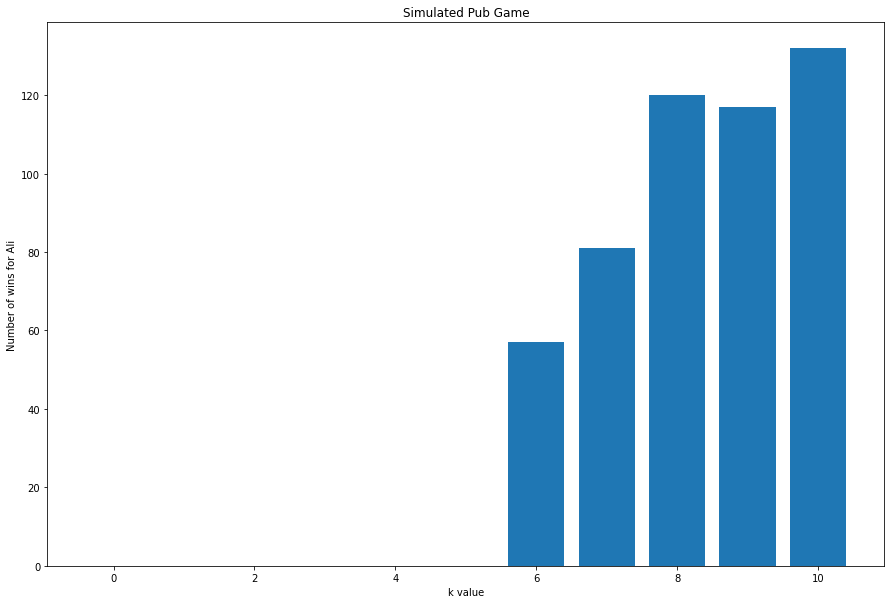

In [56]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(0,10+1), wins_array2)
plt.xlabel("k value")
plt.ylabel("Number of wins for Ali")
plt.title("Simulated Pub Game")
plt.show()

## Generalising the conjecture ##

In [128]:
def c(r_array):
    assert np.all(1<r_array), "r must be greater than 1"
    m_array = np.zeros_like(r_array)
    count_max = 100
    for i,r in enumerate(r_array):
        m = 0
        ratio = 1/r
        limit = 0
        count = 0
        while limit <= (r - 1):
            count += 1
            m += 1
            limit += 1/m
            if count > count_max:
                m = np.inf
                break
        m_array[i] = m
    return m_array

In [129]:
def d(a,k):
    return k // a

In [130]:
a = 2
r = np.linspace(1.01,100,10000)
x = 1/r
results = c(r)
def k_bound(a):
    k = (results+1)*a
    return k
#x_star = r[np.where(results == 3)][0]

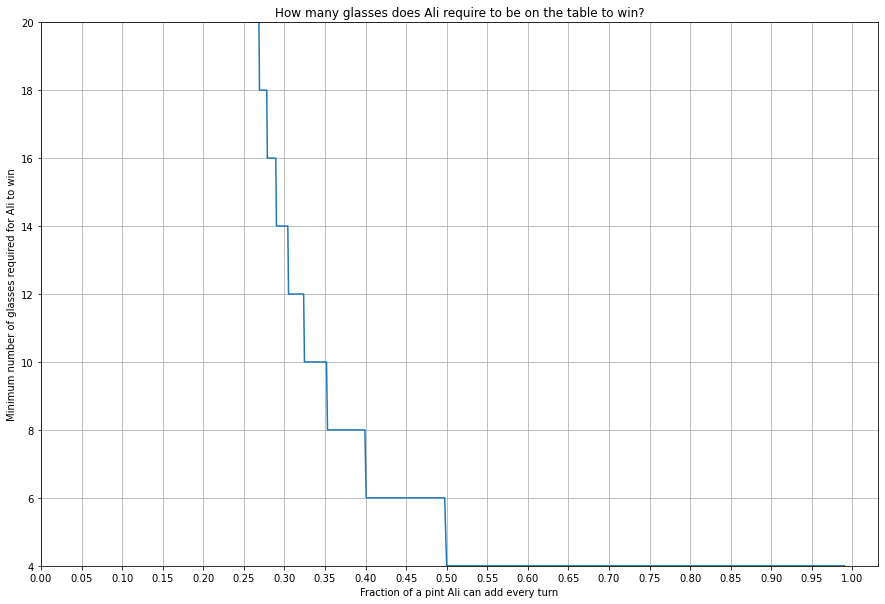

In [131]:
%matplotlib inline

plt.figure(figsize=(15,10))
plt.plot(x, k_bound(2))
plt.ylim((4-1e-5,20))
plt.grid()
plt.xticks(np.linspace(0,1,21))
plt.yticks(np.arange(4,21,2))
plt.xlabel("Fraction of a pint Ali can add every turn")
plt.ylabel("Minimum number of glasses required for Ali to win")
plt.title("How many glasses does Ali require to be on the table to win?")
plt.show()

In [132]:
%matplotlib osx

fig, ax = plt.subplots()
ax.set_xlabel("Fraction of a pint Ali can add every turn")
ax.set_ylabel("Minimum number of glasses required for Ali to win")
ax.set_title("How many glasses does Ali require to be on the table to win?")
#ax.set_ylim((2,16))
#ax.vlines(1/x_star, 2,16,'red', 'dashed', label = f'x = {1/x_star}')
plt.subplots_adjust(bottom = 0.2)
plt.grid('on')
P, = plt.plot(x, k_bound(a), label = 'Distribution of number of glasses required to win')
slider_dim = plt.axes([0.15, 0.1, 0.7, 0.02])
a_slide = Slider(slider_dim, '$a$', 1, 10,
                 valstep = 1, valinit = a)
def update(val):
    a = a_slide.val
    P.set_ydata(k_bound(a))
    fig.canvas.draw_idle()
a_slide.on_changed(update)
#plt.legend()
plt.show()

## Minimum number of moves to win ##
I can find an upper bound for the number of moves required to win

In [133]:
def n_min(r):
    m_array = c(r)
    #print(m_array)
    n0_array = np.zeros_like(m_array)
    for j,m in enumerate(m_array):
        #print(m)
        m = int(m)
        t = 1
        for i in range(1,m+1):
            t -= (1/i)*(1/r[j])
        #print(t)
        n0 = 0
        partial = 0
        #print(partial)
        while not (partial > t):
            n0 +=1
            partial += (1/2**n0)*(1/r[j])
            #print(partial)
        n0_array[j] = n0
    return n0_array

In [134]:
print(n_min(np.array([2])))

[2]


In [137]:
def min_moves(r):
    n0 = n_min(r)
    m0 = c(r)
    return m0*n0+m0

In [145]:
r2 = np.linspace(1.01,6,500)
#print(c(r2))


plt.figure(figsize=(15,10))
plt.plot(1/r2,min_moves(r2))
plt.ylabel("Number of moves for Ali to win")
plt.xlabel("Fraction of a pint Ali can add each round")
plt.title("A graph to show the upper bound on the minimum number of moves required for Ali to win")
plt.show()

2024-03-13 21:12:56.886 python[2433:210164] +[CATransaction synchronize] called within transaction
2024-03-13 21:13:02.083 python[2433:210164] +[CATransaction synchronize] called within transaction
2024-03-13 21:13:02.100 python[2433:210164] +[CATransaction synchronize] called within transaction
2024-03-13 21:13:02.183 python[2433:210164] +[CATransaction synchronize] called within transaction
2024-03-13 21:13:02.216 python[2433:210164] +[CATransaction synchronize] called within transaction
2024-03-13 21:13:02.440 python[2433:210164] +[CATransaction synchronize] called within transaction


In [143]:
#print(r2)